In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model 
from scipy.stats import linregress
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd

from sklearn.model_selection import LeaveOneOut
import pickle

# multiple, todas las medidas de grafos 

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_giga.mat')
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y']
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

In [ ]:
ventana =  2
Stren   =  grafos['Strength'][ventana]
clus    =  grafos['Clustering'][ventana]
glob    =  grafos['Global'][ventana]
path    =  grafos['Path'][ventana]

all_grafos = [Stren, clus]
all_grafos = np.asarray(all_grafos).T
print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   


(50, 2)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0061s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0061s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0185s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0361s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


(0.08994655515432254, 0.5344728908824888)


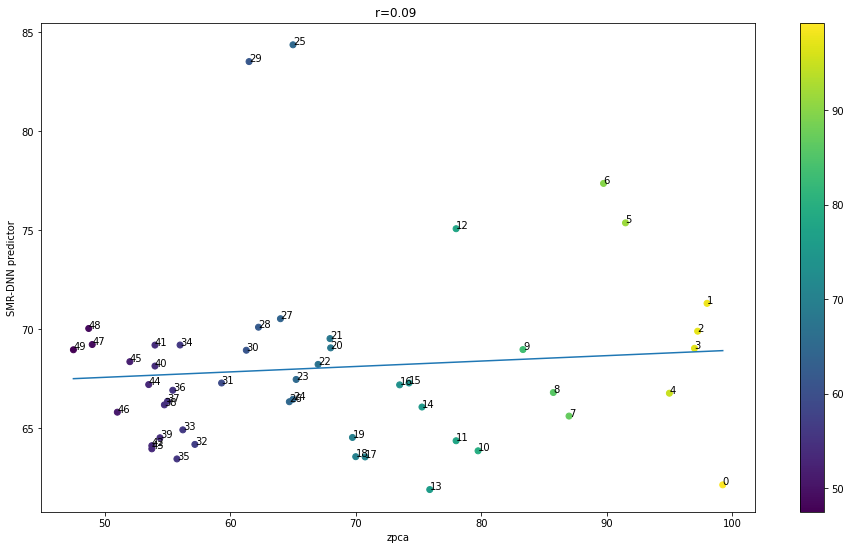

In [ ]:
indx = np.arange(0, 50)
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()


# average

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')
graf= grafos['Global'] #grafos[tipo de grafo][ventanas de frecuencias][valores de fecuencias] 
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_giga.mat')['Y']
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

(50, 1)
(-0.09505605607905032, 0.5114145969261885)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0079s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0132s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0102s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0225s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


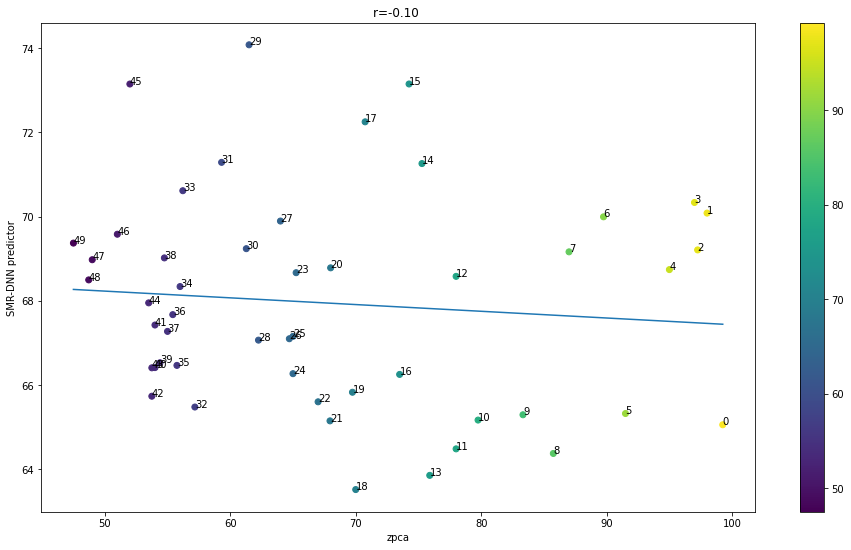

In [ ]:
ventana = 0
zpca=y
all_grafos = graf[ventana]
all_grafos = all_grafos.reshape(zpca.shape[0],1)

print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   
indx = np.arange(0, all_grafos.shape[0])

print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# Best Channel

In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy_ch.mat')
graf=grafos['Clustering'] #, 'Clustering', 'Strength'
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v2_phy.mat')['Y'] 
grafos.keys()


dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
#ventana = 1
zpca=y
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]
pipeline = Pipeline(steps) 

for ventana in range(0,3):
  pearson= []
#graf[0][channel][ventana].shape
  for channel in range(graf[0].shape[0]):
    all_grafos = graf[0][channel][ventana]
    all_grafos = all_grafos.reshape(zpca.shape[0],1)
    ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=0,n_jobs=-1)
    #print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))
    pearson+= [pearsonr(zpca.reshape(-1),ypred.reshape(-1))] 


  pearson=np.asarray(pearson)
  r=pearson[:,0]
  r.shape
  np.max (r)
  print(pearson.shape) 
  print('ventana', ventana, '=',pearson[np.where(r == np.amax(r)),:])

(64, 2)
ventana 0 = [[[0.23137708 0.01755607]]]
(64, 2)
ventana 1 = [[[3.87503652e-01 4.42758899e-05]]]
(64, 2)
ventana 2 = [[[0.15199709 0.12165339]]]


In [ ]:
frec= 1
#channel = 0
pearson= []
for i in range(grafos['Clustering'][0].shape[0]):
  channel = i
  data = grafos['Clustering'][0][channel][frec]  
  pearson+= [pearsonr(data.reshape(-1), y.reshape(-1))]

pearson=np.asarray(pearson)
r=pearson[:,0]
r.shape
np.max (r)

print(pearson[np.where(r == np.amax(r)),:])


[[[4.42894551e-01 2.23332954e-06]]]


(-0.3575996778979246, 0.00018034323101054288)


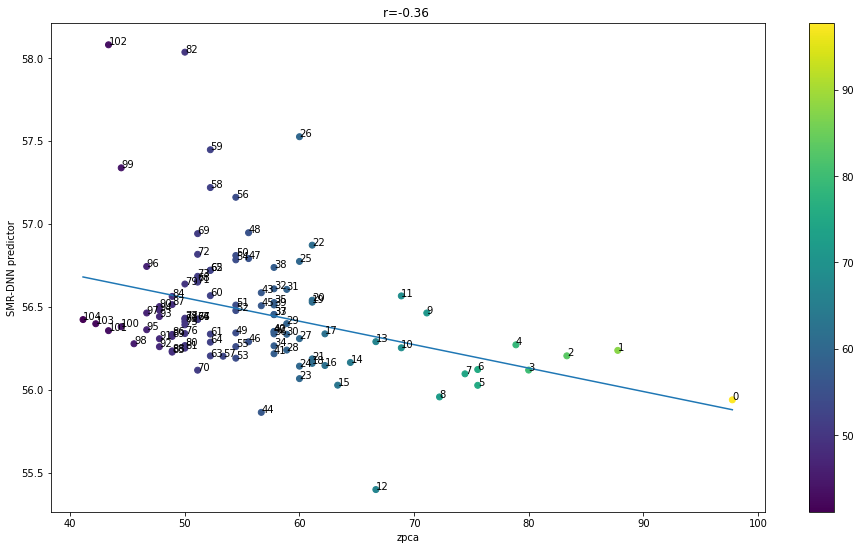

In [ ]:
indx = np.arange(0, all_grafos.shape[0])
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# multivariada 


(todos los canales), 


In [ ]:
grafos=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga_ch.mat')
graf=grafos['Strength'] #, 'Clustering', 'Strength'
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_giga.mat')['Y'] 
grafos.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tamañoX = graf[0].shape[0]
frec       = 0
all_grafos = []
for channel in range(0, tamañoX):
  freuenciasxcanal = graf[0][channel][frec]
  all_grafos+= [freuenciasxcanal]
all_grafos=np.asarray(all_grafos).T 
print(all_grafos.shape, y.shape)

(50, 64) (50, 1)


In [ ]:
print(all_grafos.shape)
steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,all_grafos,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

(50, 64)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0048s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0154s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0203s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0369s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


(0.5679156613396306, 1.6961670056143013e-05)


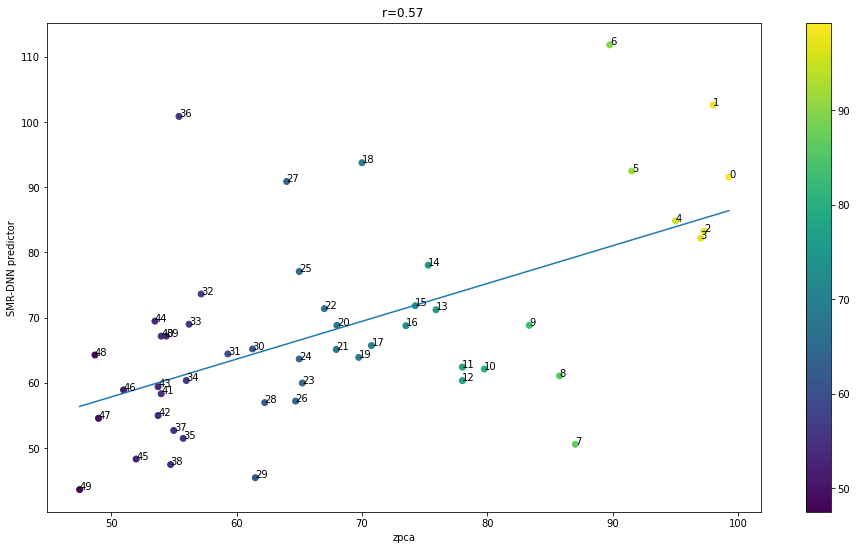

In [ ]:
indx = np.arange(0, all_grafos.shape[0])
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()

# Multiple multivariada! 
concatenar matrices y vectores! 
sujetos x matrices - vectores


In [ ]:
grafos1=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy_ch.mat')
#grafos['Clustering'][0][channels][frecuencias], 0 = theta, 1 = alpha o mu, 2 = beta low, 3 = beta mid, 4 = beta high
y=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy.mat')['Y'] 
grafos1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Strength'])

In [ ]:
grafos2=loadmat('/content/drive/MyDrive/CX_Regression/datosFrank/Graphs_v1_phy.mat')
#graf= grafos['Path'] #grafos[tipo de grafo][ventanas de frecuencias][valores de fecuencias] 
grafos2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Clustering', 'Global', 'Path', 'Strength', 'Y'])

In [ ]:
## agrupar global y path
ventana =  2
glob    =  grafos2['Global'][ventana]
path    =  grafos2['Path'][ventana]

all_grafos = [glob, path]
all_grafos = np.asarray(all_grafos).T
print(all_grafos.shape)
## agrupar Strength por canales

grafstre=grafos1['Strength']
tamañoX = grafstre[0].shape[0]
frec       = ventana
all_channels_stre = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafstre[0][channel][frec]
  all_channels_stre+= [freuenciasxcanal]
all_channels_stre=np.asarray(all_channels_stre).T 
print(all_channels_stre.shape)

## agrupar Clustering por canales 
grafclus=grafos1['Clustering']
all_channels_clus = []
for channel in range(0, tamañoX):
  freuenciasxcanal = grafclus[0][channel][frec]
  all_channels_clus += [freuenciasxcanal]
all_channels_clus =np.asarray(all_channels_clus ).T 
print(all_channels_clus .shape)
multiplemultivariada = np.concatenate((all_grafos, all_channels_clus, all_channels_stre),axis = 1 )
multiplemultivariada.shape

steps = [('zscore', StandardScaler()), 
          ('linear', LinearRegression())]

pipeline = Pipeline(steps)   
ypred    = cross_val_predict(pipeline,multiplemultivariada,y,cv=LeaveOneOut(),verbose=10,n_jobs=-1)   

(105, 2)
(105, 64)
(105, 64)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0139s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0281s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0460s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0856s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1441s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done  95 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 102 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    0.4s finished


(0.04584690055901045, 0.6423528509507818)


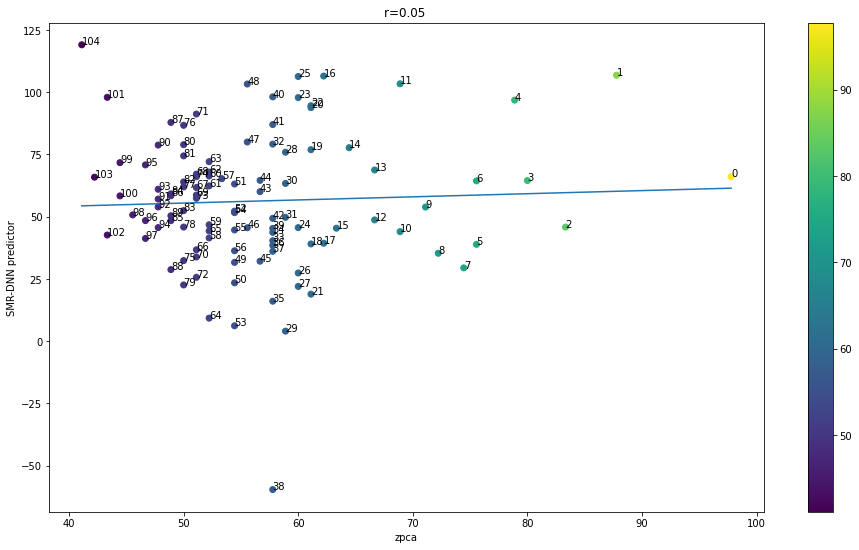

In [ ]:
indx = np.arange(0, all_grafos.shape[0])
zpca=y
print(pearsonr(zpca.reshape(-1),ypred.reshape(-1)))

_, _, r_value, _, _ = linregress(zpca.reshape(-1),ypred.reshape(-1))
regr = LinearRegression()
regr.fit(zpca.reshape(-1,1),ypred.reshape(-1,1))
lrpred = regr.predict(zpca.reshape(-1,1))
plt.figure(figsize=(16,9))
plt.plot(zpca,lrpred)
plt.scatter(zpca,ypred,c=zpca)
for i in range(zpca.shape[0]):
    plt.text(zpca[i],ypred[i],indx[i])
plt.xlabel('zpca')
plt.ylabel('SMR-DNN predictor')
plt.title('r=%.2f '%r_value)
plt.colorbar()
plt.show()